# Data Preparation 

Name: Darren King
Student_ID: 17145031

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

In [22]:
#Load the requisite csv file into a dataframe

df = pd.read_csv('bank.csv')

In [23]:
original_df = df # Keeping the original for future reference

## Encode all categorical attributes as numerical

In [24]:
# Checking the type of each column

df.dtypes

age           float64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
subscribed     object
dtype: object

In [25]:
categorical_columns = df.select_dtypes(include=["object"])
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job         1990 non-null   object
 1   marital     2000 non-null   object
 2   education   1896 non-null   object
 3   default     2000 non-null   object
 4   housing     2000 non-null   object
 5   loan        2000 non-null   object
 6   contact     1809 non-null   object
 7   month       2000 non-null   object
 8   poutcome    1546 non-null   object
 9   subscribed  2000 non-null   object
dtypes: object(10)
memory usage: 156.4+ KB


From the categorical_columns.info() call we can see that job, marital, education, default, housing, loan, contact, month, poutcome and subscribed are all of the type object and therefore categorical data. The remaining data consists of numerical 64 bit floats or integers.

Categorical = [job, marital, education, default, housing, loan, contact, month, pouctome, subscribed]

Categorical data is either: 1. Ordinal, 2. Nominal

Ordinal data is a data type with a set order or scale. Of the categorical data, I'm identifying the following as the ordinal data:

Ordinal = [education, month]

Nominal data is data used to name variables without providing any numerical value

Nominal = [job, marital, default, housing, loan, contact, poutcome, subscribed]

We need to encode the ordinal categorical data.


In [26]:
# Manipulating dictionaries and lists - there's a more elegant way to do this with dataframes, I just haven't found it yet.
import calendar
d = dict(enumerate(calendar.month_name))
d_value = list(d.values())
d_key = list(d.keys())
d_value.pop(0)
d_key.pop(0)
d_value_2 =[]

for month in d_value:
    month = month.lower()[:3]
    d_value_2.append(month)

month_map = dict(zip(d_value_2, d_key))
print(month_map)

{'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}


In [27]:
## Encode all Categorical Attributes as Numerical

# Mappings

education_map = {
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

df['education'] = df['education'].replace(education_map)
df['month'] = df['month'].replace(month_map)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   float64
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   int64  
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(2), int64(7), object(8)
memory usage: 265.8+ KB


In [29]:
# Step 1 - Encode all the categorical values that have NaNs

df = pd.get_dummies(df, columns=['job', 'contact', 'poutcome'], dummy_na=True, drop_first=False)
#Using drop_first as True here will remove the admin category of job, the primary category of education etc. So set to False

# Step 2 - Encode the remainder of the dataframe

df = pd.get_dummies(df, drop_first=False)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1988 non-null   float64
 1   education          1896 non-null   float64
 2   balance            2000 non-null   int64  
 3   day                2000 non-null   int64  
 4   month              2000 non-null   int64  
 5   duration           2000 non-null   int64  
 6   campaign           2000 non-null   int64  
 7   pdays              2000 non-null   int64  
 8   previous           2000 non-null   int64  
 9   job_admin.         2000 non-null   uint8  
 10  job_blue-collar    2000 non-null   uint8  
 11  job_entrepreneur   2000 non-null   uint8  
 12  job_housemaid      2000 non-null   uint8  
 13  job_management     2000 non-null   uint8  
 14  job_retired        2000 non-null   uint8  
 15  job_self-employed  2000 non-null   uint8  
 16  job_services       2000 

I don't like that poutcome has 4 columns; let's explore this:

In [32]:
df[['poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_nan']].tail(20)

,poutcome_failure,poutcome_other,poutcome_success,poutcome_nan
1980,0,0,0,1
1981,0,0,0,1
1982,0,0,0,1
1983,0,0,0,1
1984,0,0,0,1
1985,0,0,0,1
1986,0,0,0,1
1987,0,0,0,1
1988,0,0,0,1
1989,0,0,0,1


## Dealing with Missing Values

In [682]:
# Determine the number of missing values in the dataframe

df.isna().sum()

age                   12
education            104
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
contact_cellular       0
contact_telephone      0
contact_nan            0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

In [683]:
original_df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

We can see from the above that by categorising the NaN values of categorical data into seperate columns that the only attribute with missing data is the age.
We can look at the correlation between the age and the other attributes using a heatmap

<AxesSubplot:>

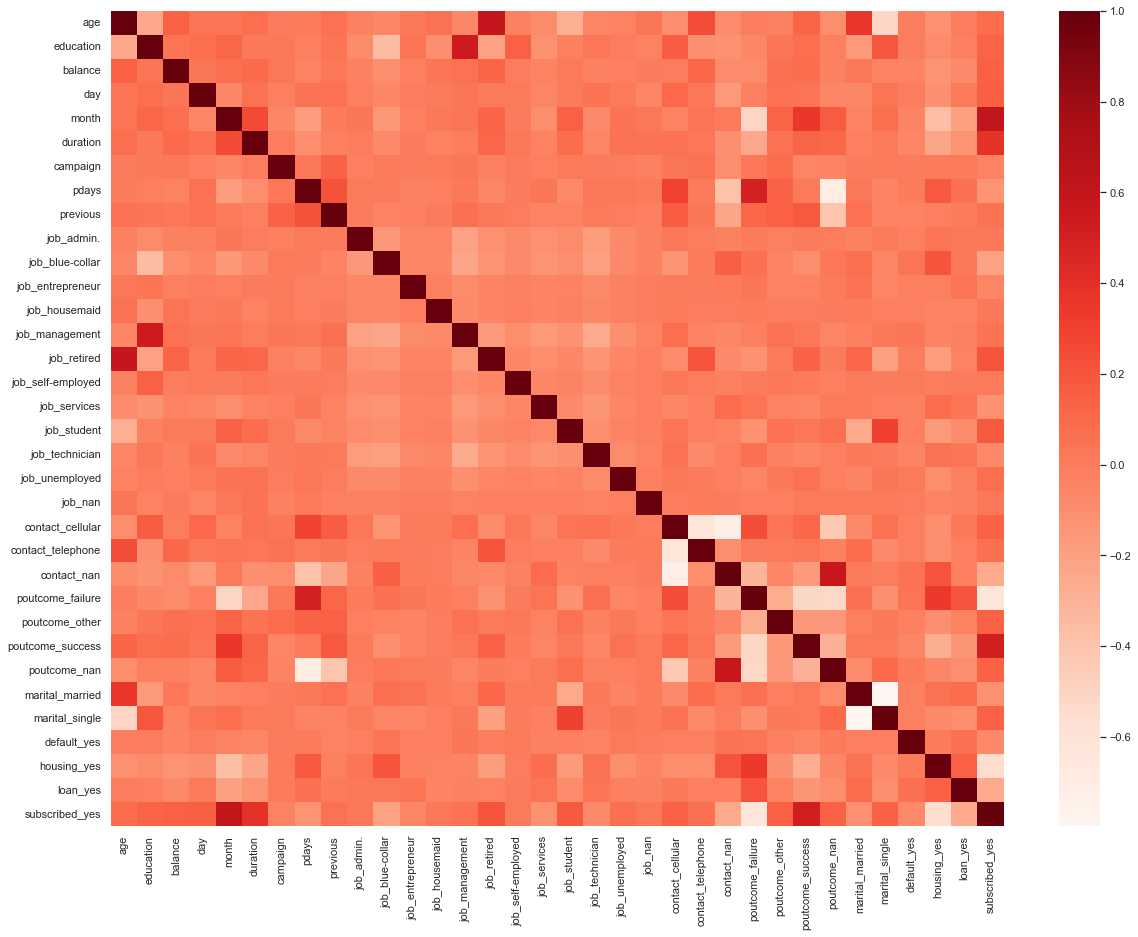

In [684]:
sns.set(rc = {'figure.figsize': (20,15)})
sns.heatmap(df.corr(), cmap="Reds", annot=False)

We can see some correlation between age and job_retired and age and marital_married, but is this applicable in the case of our missing ages? Given there's only 12 missing ages it's not unreasonable to look at those data tuples.

In [685]:
df_age_nan = df[df.age.isna()]
df_age_nan

,age,education,balance,day,month,duration,campaign,pdays,previous,job_admin.,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
456,NaN,3.0,917,6,2,518,3,212,5,0,...,1,0,0,0,1,0,0,0,0,0
472,NaN,1.0,474,9,2,152,3,221,1,0,...,1,0,0,0,1,0,0,1,1,0
526,NaN,2.0,2478,28,1,347,1,230,1,0,...,1,0,0,0,1,0,0,1,0,0
595,NaN,3.0,1857,29,1,386,1,168,4,0,...,1,0,0,0,1,0,0,0,0,0
597,NaN,2.0,254,29,1,194,1,188,1,0,...,1,0,0,0,1,0,1,1,1,0
601,NaN,2.0,111,29,1,55,1,195,3,1,...,1,0,0,0,0,1,0,1,0,0
605,NaN,3.0,1330,29,1,41,2,261,1,0,...,1,0,0,0,1,0,0,1,0,0
744,NaN,3.0,-61,30,1,90,5,172,1,0,...,1,0,0,0,1,0,0,0,0,0
795,NaN,3.0,992,4,5,301,1,88,2,0,...,0,0,1,0,0,1,0,1,0,0
1171,NaN,3.0,2812,3,8,392,4,181,3,0,...,0,0,1,0,1,0,0,0,0,1


3/4's of those for whom we have no ages are married but only 1 is retired. The correlation that we see between age and retired and age and married is an expected correlation as age is a predictor of those two other attributes.

In [686]:
table1 = pd.pivot_table(data=df[["job_retired", "marital_married"]], index=df["age"])
table1

,job_retired,marital_married
age,,
18.0,0.000000,0.000000
19.0,0.000000,0.000000
20.0,0.000000,0.000000
21.0,0.000000,0.000000
22.0,0.000000,0.000000
...,...,...
81.0,1.000000,0.500000
82.0,0.666667,0.333333
84.0,1.000000,0.666667


<AxesSubplot:xlabel='age'>

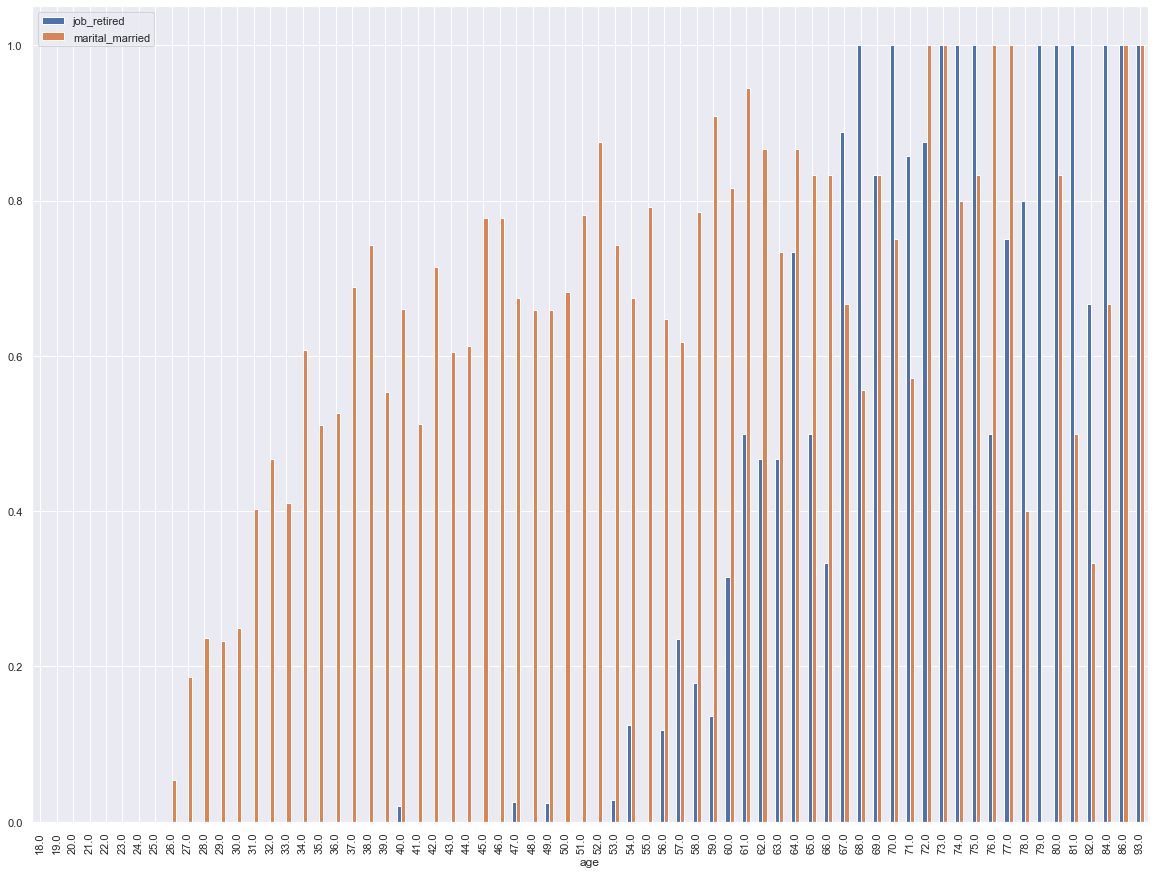

In [687]:
table1.plot(kind='bar')

As we can see, unsurprisingly, the number of individuals who are married and who are retired rises as age rises. In the first e-tivity I utilised a linear regression model to impute the missing ages, I feel that simply using a median value is potentially the most suitable option.

In [688]:
df['age'].fillna(df['age'].median(), inplace=True)

In [689]:
df.isna().sum()

age                    0
education            104
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
contact_cellular       0
contact_telephone      0
contact_nan            0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

As can be seen, there are no missing values left that have to be dealt with.

## Rescaling Features & Treatment of Outliers

In [690]:
#Which features need to be rescaled in consideration of outliers?
df.describe()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_admin.,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
count,2000.00000,1896.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.73050,2.246308,1413.663500,13.851500,5.002500,292.020500,1.909500,167.896000,2.561500,0.123500,...,0.477500,0.073500,0.222000,0.227000,0.555500,0.337000,0.007500,0.481500,0.125000,0.500000
std,12.68942,0.644020,3131.224213,9.712189,3.079974,221.557295,1.378862,131.754126,3.400735,0.329093,...,0.499618,0.261021,0.415695,0.418997,0.497034,0.472803,0.086299,0.499783,0.330802,0.500125
min,18.00000,1.000000,-980.000000,1.000000,1.000000,7.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,2.000000,201.500000,5.000000,2.000000,146.000000,1.000000,75.750000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,2.000000,551.000000,12.000000,5.000000,236.000000,1.000000,182.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,50.00000,3.000000,1644.500000,23.000000,7.000000,379.000000,2.000000,251.000000,3.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,93.00000,3.000000,81204.000000,31.000000,12.000000,1823.000000,11.000000,854.000000,55.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


By using .describe() we can look at the mean, min, max and standard deviation, this will give us a picture of those attributes containing outliers. the following attributes contain outliers/need to be rescaled
age
balance
day
duration
campaign
pdays
previous

### Day
Day can take a value between 1 and 31, but that value is dependent on the month and also if the year is a leap year; the data was collected from 2008 to 2013 and we don't know which year each piece of data was collected. Is there value to dividing the data by the length of the month from which the data was collected or is it reasonable to treat all values equally and divide by 31? Let's work on the later assumption.

In [691]:
df['day'] = df['day']/31

In [692]:
df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].describe()

,age,balance,day,duration,campaign,pdays,previous
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.73050,1413.663500,0.446823,292.020500,1.909500,167.896000,2.561500
std,12.68942,3131.224213,0.313296,221.557295,1.378862,131.754126,3.400735
min,18.00000,-980.000000,0.032258,7.000000,1.000000,-1.000000,0.000000
25%,32.00000,201.500000,0.161290,146.000000,1.000000,75.750000,1.000000
50%,38.00000,551.000000,0.387097,236.000000,1.000000,182.000000,2.000000
75%,50.00000,1644.500000,0.741935,379.000000,2.000000,251.000000,3.000000
max,93.00000,81204.000000,1.000000,1823.000000,11.000000,854.000000,55.000000


From the above we can see that the day attribute has now been rescaled. The campaign value has a relatively low standard deviation so we can look at that attribute next, but first let's visualise the remaining attributes as Histograms.

We can visualise the outliers from the 6 categories we identified above.

In [693]:
def histogram_outliers (data):
    fi, ax = plt.subplots(figsize=(10,8))
    ax.set_title(str(data.name).title() + " Histogram")
    ax.set_xlabel(str(data.name).title())
    ax.set_ylabel("Number of Applicants")
    data.hist(ax=ax, bins=30)


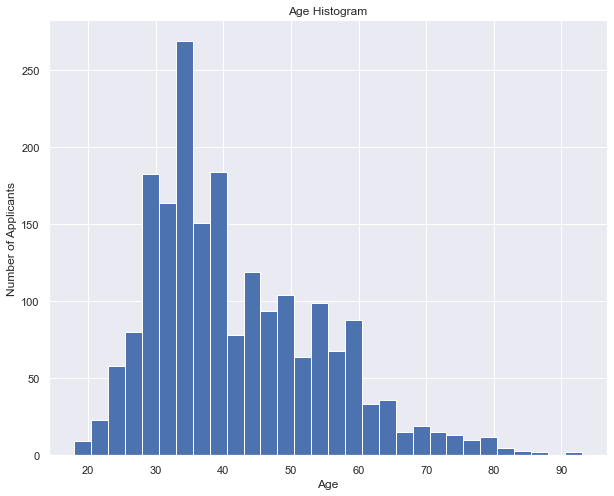

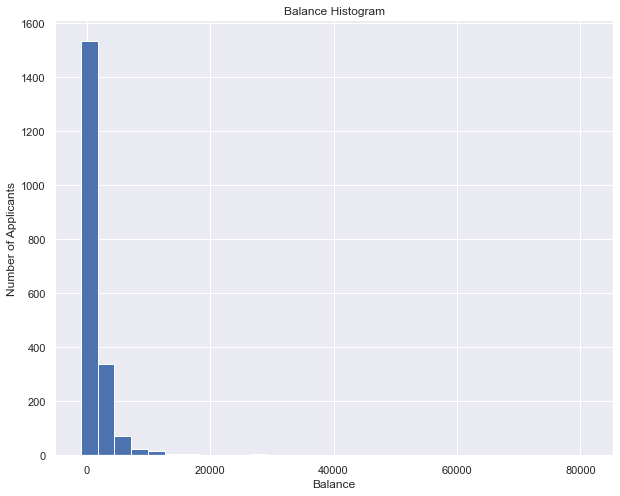

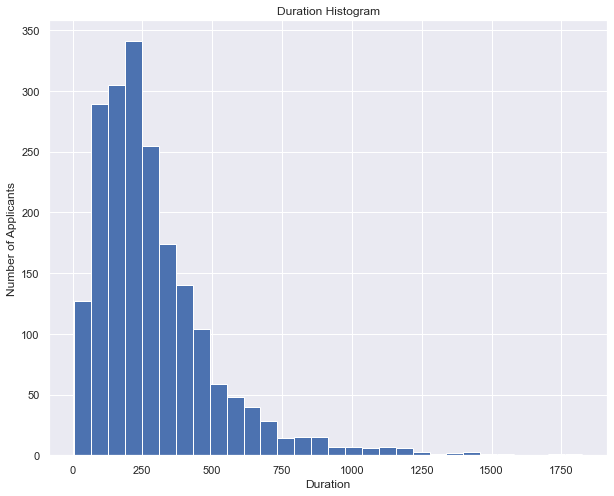

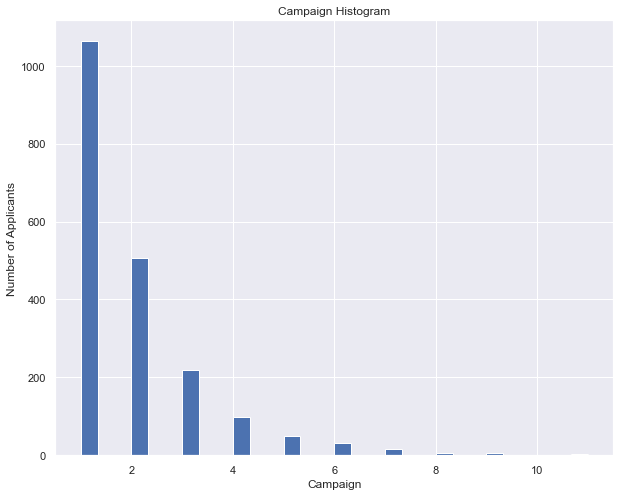

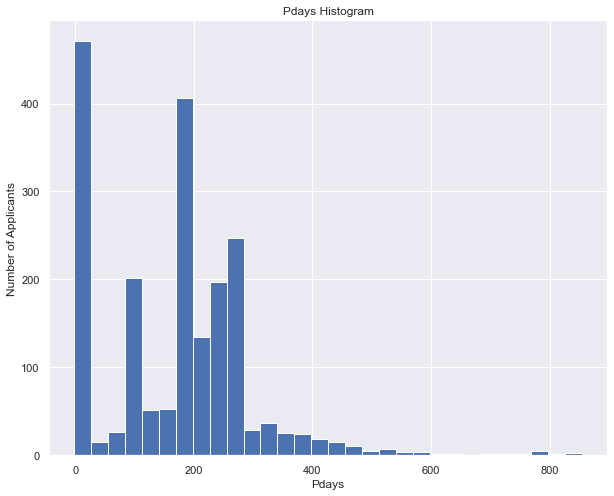

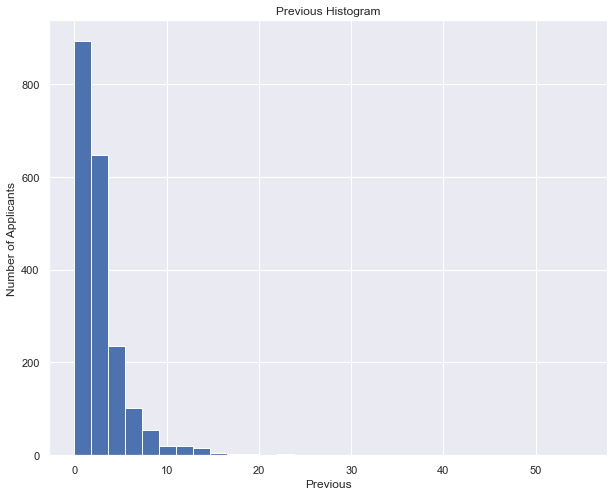

In [694]:
histogram_outliers(df["age"])
histogram_outliers(df['balance'])
histogram_outliers(df['duration'])
histogram_outliers(df['campaign'])
histogram_outliers(df['pdays'])
histogram_outliers(df['previous'])

As can be seen from the skew in the histogram we have outliers in all these categories.

### Campaign
Let's look at the campaign in terms of counts. Are we just effectively dealing with ordinal numerical data? Apply a MinMaxScaler. The Min-Max Scaler will work well here because, as mentioned above, the standard deviation is small and the distribution is not Gaussian. (Note: Sensitive to outliers).


In [695]:
df[['campaign']].value_counts(normalize=False)

campaign
1           1063
2            506
3            219
4             99
5             50
6             31
7             17
8              6
9              5
11             3
10             1
dtype: int64

In [696]:
min_max_scaler = MinMaxScaler()
df[['campaign']] = min_max_scaler.fit_transform(df[['campaign']])

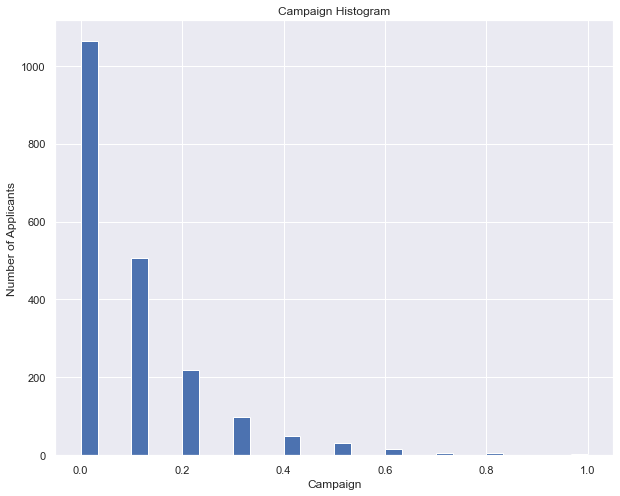

In [697]:
# Let's see how this looks scaled on a histogram

histogram_outliers(df['campaign'])

### Age, Balance, pdays, Duration, Previous

As per the UCI Machine Learning Repository - the duration attribute highly affects the output target and thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. As such, it's not unreasonable to drop this attribute.

If we consider the pdays attribute which represents the number of days that passed by after the client was contacted from a previous campaign, all -1 values represent clients that were not previously contacted. What percentage of teh dataset is this?


In [698]:
df.drop('duration', axis=1, inplace=True)

In [699]:
df['pdays'].value_counts(normalize=True)

-1      0.2270
 182    0.0340
 181    0.0310
 92     0.0255
 91     0.0205
         ...  
 109    0.0005
 43     0.0005
 82     0.0005
 277    0.0005
 409    0.0005
Name: pdays, Length: 363, dtype: float64

22.7% of pdays represents clients not previously contacted - is holding this data in the pdays attribute when scaling and treating outliers correct? Yes, as they could be represented by a 0. Given no 0 values exist is it reasonable/acceptable to shift all values up by 1, or just shift the -1 values into the 0 value or use a scaling technique that accepts negative values?

In [700]:
# We want to see what the minimum values in each of these columns/attributes is:

df[['age', 'balance', 'pdays', 'previous']].min()

age          18.0
balance    -980.0
pdays        -1.0
previous      0.0
dtype: float64

In [701]:
df[['age', 'balance', 'pdays', 'previous']].describe()

,age,balance,pdays,previous
count,2000.00000,2000.000000,2000.000000,2000.000000
mean,41.73050,1413.663500,167.896000,2.561500
std,12.68942,3131.224213,131.754126,3.400735
min,18.00000,-980.000000,-1.000000,0.000000
25%,32.00000,201.500000,75.750000,1.000000
50%,38.00000,551.000000,182.000000,2.000000
75%,50.00000,1644.500000,251.000000,3.000000
max,93.00000,81204.000000,854.000000,55.000000


We have 2 attributes which contain only positive values, we have 2 attributes that have positive and negative values - all attributes contain outliers - we could use a Robust Scaler or a Power Transformer amongst others. As per the example workthrough, I'm going to use a Robust Scaler and then apply a logarithmic conversion.

In [702]:
robust_scaler = RobustScaler()
df[['age', 'balance', 'pdays', 'previous']] = robust_scaler.fit_transform(df[['age', 'balance', 'pdays', 'previous']])

In [703]:
df[['age', 'balance', 'pdays', 'previous']].describe()

,age,balance,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.207250,0.597826,-0.080479,0.280750
std,0.704968,2.169941,0.751807,1.700368
min,-1.111111,-1.060984,-1.044223,-1.000000
25%,-0.333333,-0.242204,-0.606277,-0.500000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.757796,0.393723,0.500000
max,3.055556,55.892585,3.834522,26.500000


If we chose to do a log transformation of the data to deal with the outliers, we need to remove negative values.
More specifically we need to shift all the values to a range for which the natural log works (assuming we're using the natural log).
The natural log is undefined on 0 values.
As such, shift the values to [1, + Infinity]

In [704]:
df['age'] = np.log(df['age'] + 2.11)
df['balance'] = np.log(df['balance'] + 2.06)
df['pdays'] = np.log(df['pdays'] + 2.04)
df['previous'] = np.log(df['previous'] + 2)

In [705]:
# We can see what the data looks like now post scaling and dealing with outliers by calling the histogram function again.

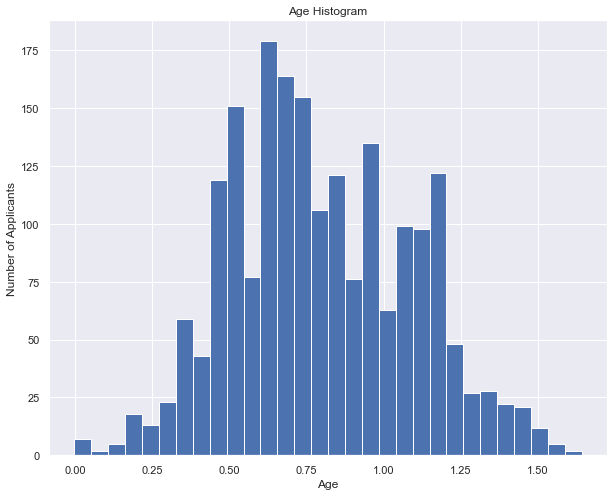

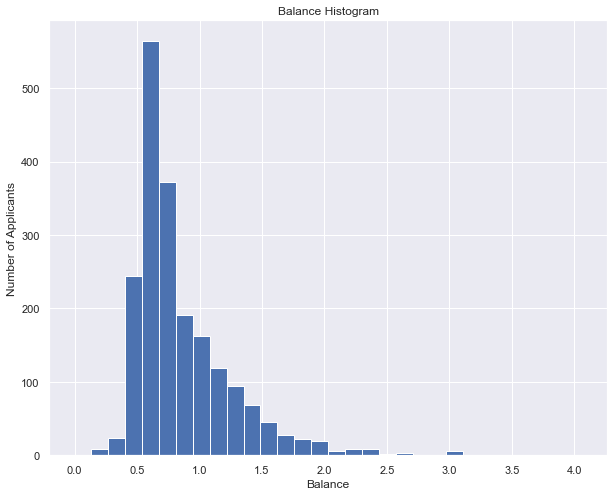

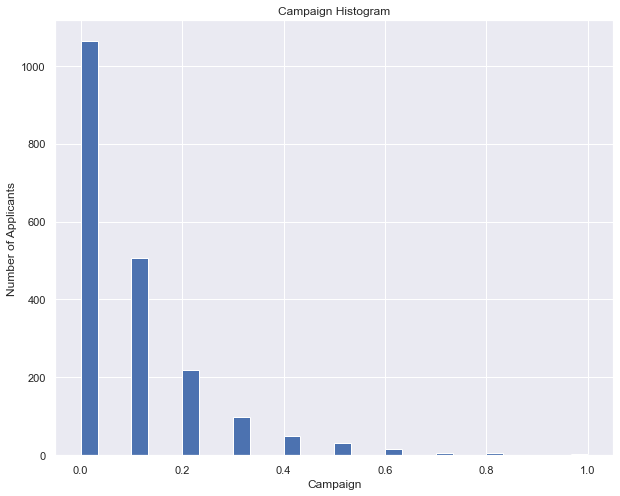

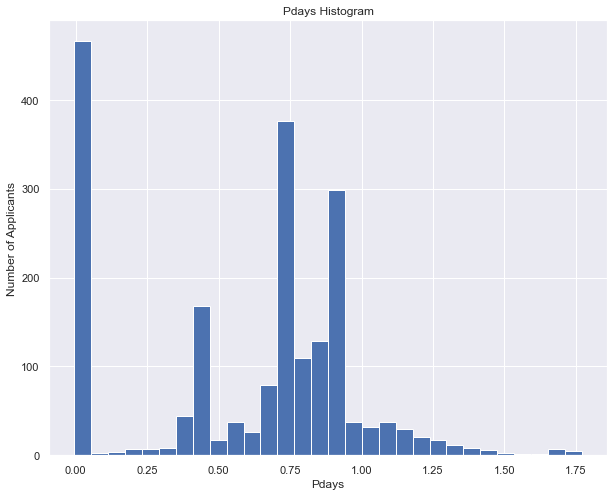

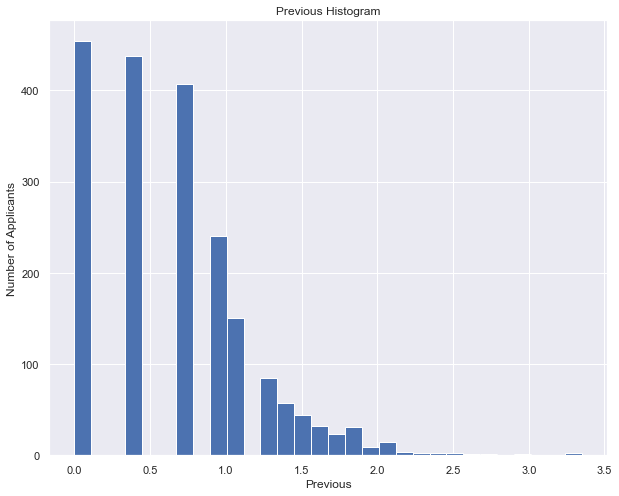

In [706]:
histogram_outliers(df["age"])
histogram_outliers(df['balance'])
histogram_outliers(df['campaign'])
histogram_outliers(df['pdays'])
histogram_outliers(df['previous'])

Think: Have I considered the best approach for scaling the days?

## Creation of Derived Features


In [707]:
df.describe()

,age,education,balance,day,month,campaign,pdays,previous,job_admin.,job_blue-collar,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
count,2000.000000,1896.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.796825,2.246308,0.863912,0.446823,5.002500,0.090950,0.597845,0.664755,0.123500,0.149000,...,0.477500,0.073500,0.222000,0.227000,0.555500,0.337000,0.007500,0.481500,0.125000,0.500000
std,0.292737,0.644020,0.403195,0.313296,3.079974,0.137886,0.394928,0.527848,0.329093,0.356178,...,0.499618,0.261021,0.415695,0.418997,0.497034,0.472803,0.086299,0.499783,0.330802,0.500125
min,-0.001112,1.000000,-0.000985,0.032258,1.000000,0.000000,-0.004231,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.574739,2.000000,0.597625,0.161290,2.000000,0.000000,0.360273,0.405465,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.746688,2.000000,0.722706,0.387097,5.000000,0.000000,0.712950,0.693147,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,1.021251,3.000000,1.035955,0.741935,7.000000,0.100000,0.889422,0.916291,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.642013,3.000000,4.059625,1.000000,12.000000,1.000000,1.770625,3.349904,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The bank seperates out a house loan and a personal loan, it may be pertinent/useful to know whether an individual has any loan at a given time.

In [708]:
df['loan_yes'].head(20)

0     0
1     1
2     1
3     1
4     0
5     0
6     1
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
Name: loan_yes, dtype: uint8